In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./"
sz=224

In [4]:
import pydicom
import glob
import os
import numpy

In [298]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [299]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [300]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [301]:
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [302]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,504476,4114,PD,M,69,7,SPECT,Reconstructed DaTSCAN,Processed,5/01/2015,DCM,5/27/2018
1,388517,3592,PD,M,62,0,SPECT,Reconstructed DaTSCAN,Processed,3/07/2013,DCM,5/27/2018
2,388557,3910,PD,M,59,0,SPECT,Reconstructed DaTSCAN,Processed,12/18/2012,DCM,5/27/2018
3,355954,3557,PD,M,60,5,SPECT,Reconstructed DaTSCAN,Processed,1/17/2012,DCM,5/27/2018
4,355216,3588,PD,F,49,0,SPECT,Reconstructed DaTSCAN,Processed,8/17/2012,DCM,5/27/2018


In [303]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [304]:
len(lstFilesDCM)

1569

In [305]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [306]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [307]:
df = metadata[['Image Data ID','Group']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [10]:
df.loc[df.index == 340366]

,Group,Filenames
Image Data ID,,
340366,Control,../../Downloads/PPMISPECT/PPMI 4/3428/Reconstr...


In [24]:
y = np.asarray(pd.factorize(df['Group']))[0]
#For multiple image
y_append = np.append(y,(y,y,y,y,y))

In [25]:
len(y_append)

9438

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_append, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [1573, 9438]

In [308]:
lstFilesDCM = df['Filenames'].values

In [309]:
lstFilesDCM = lstFilesDCM.tolist()

In [296]:
df.sample(frac=0.2, axis=0)

,Group,Filenames
Image Data ID,,
419586,PD,./PPMI 4/3866/Reconstructed_DaTSCAN/2013-09-05...
343859,PD,./PPMI 2/3231/Reconstructed_DaTSCAN/2012-07-03...
468273,PD,./PPMI 3.5/3476/Reconstructed_DaTSCAN/2014-09-...
418716,PD,./PPMI 7/4071/Reconstructed_DaTSCAN/2013-08-21...
418355,PD,./PPMI 3.5/3429/Reconstructed_DaTSCAN/2012-08-...
419669,PD,./PPMI 2/3462/Reconstructed_DaTSCAN/2013-09-17...
442974,PD,./PPMI 4/3634/Reconstructed_DaTSCAN/2014-04-24...
339899,PD,./PPMI 5/3313/Reconstructed_DaTSCAN/2012-01-10...
767695,PD,./PPMI 7/3218/Reconstructed_DaTSCAN/2015-11-11...


In [17]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [18]:
RefDs

(0008, 0000) Group Length                        UL: 444
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'RECON TOMO', 'EMISSION']
(0008, 0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.5320087963655016311
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.08067522598960419796
(0008, 0020) Study Date                          DA: '20130409'
(0008, 0021) Series Date                         DA: '20130409'
(0008, 0022) Acquisition Date                    DA: '20130409'
(0008, 0023) Content Date                        DA: '20130409'
(0008, 0030) Study Time                          TM: '135229.796000'
(0008, 0031) Series Time                         TM: '135333.000000'
(0008, 0032) Acquisition Time                    TM: '135229'
(0008, 0033) Content Time                        TM: '135333.000000'
(0008, 0060) Modality                

In [19]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [20]:
# The array is sized based on 'ConstPixelDims'
#ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ArrayDicom = numpy.zeros((91,109,91,len(lstFilesDCM)), dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

ValueError: could not broadcast input array from shape (60,128,128) into shape (91,109,91)

In [21]:
x.shape

(110,)

In [22]:
ArrayDicom.shape

(91, 109, 91, 1573)

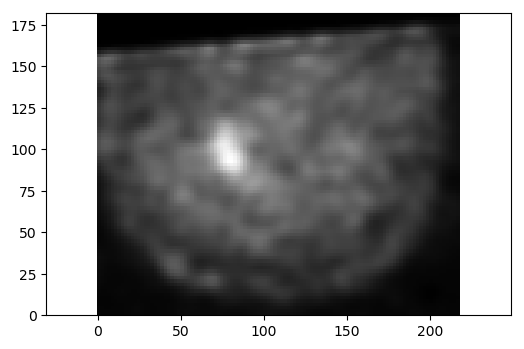

In [23]:
plt.figure(dpi=100)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 40, 8]))

In [28]:
ds.pixel_array[40].shape

(109, 91)

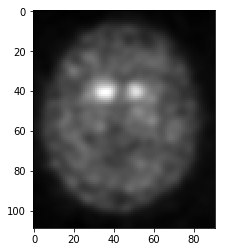

In [29]:
plt.imshow(ds.pixel_array[40], cmap = plt.gray())

In [288]:
a = pydicom.read_file(lstFilesDCM[55])

In [289]:
a.pixel_array.shape

(91, 109, 91)

In [310]:
# loop through all the DICOM files
image_array_39 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39.append(ds.pixel_array[39])
    #For debug corrupted image
    print(np.asarray(image_array).shape)

0
(1569, 109, 91, 3)
1
(1569, 109, 91, 3)
2
(1569, 109, 91, 3)
3
(1569, 109, 91, 3)
4
(1569, 109, 91, 3)
5
(1569, 109, 91, 3)
6
(1569, 109, 91, 3)
7
(1569, 109, 91, 3)
8
(1569, 109, 91, 3)
9
(1569, 109, 91, 3)
10
(1569, 109, 91, 3)
11
(1569, 109, 91, 3)
12
(1569, 109, 91, 3)
13
(1569, 109, 91, 3)
14
(1569, 109, 91, 3)
15
(1569, 109, 91, 3)
16
(1569, 109, 91, 3)
17
(1569, 109, 91, 3)
18
(1569, 109, 91, 3)
19
(1569, 109, 91, 3)
20
(1569, 109, 91, 3)
21
(1569, 109, 91, 3)
22
(1569, 109, 91, 3)
23
(1569, 109, 91, 3)
24
(1569, 109, 91, 3)
25
(1569, 109, 91, 3)
26
(1569, 109, 91, 3)
27
(1569, 109, 91, 3)
28
(1569, 109, 91, 3)
29
(1569, 109, 91, 3)
30
(1569, 109, 91, 3)
31
(1569, 109, 91, 3)
32
(1569, 109, 91, 3)
33
(1569, 109, 91, 3)
34
(1569, 109, 91, 3)
35
(1569, 109, 91, 3)
36
(1569, 109, 91, 3)
37
(1569, 109, 91, 3)
38
(1569, 109, 91, 3)
39
(1569, 109, 91, 3)
40
(1569, 109, 91, 3)
41
(1569, 109, 91, 3)
42
(1569, 109, 91, 3)
43
(1569, 109, 91, 3)
44
(1569, 109, 91, 3)
45
(1569, 109, 91, 3

(1569, 109, 91, 3)
372
(1569, 109, 91, 3)
373
(1569, 109, 91, 3)
374
(1569, 109, 91, 3)
375
(1569, 109, 91, 3)
376
(1569, 109, 91, 3)
377
(1569, 109, 91, 3)
378
(1569, 109, 91, 3)
379
(1569, 109, 91, 3)
380
(1569, 109, 91, 3)
381
(1569, 109, 91, 3)
382
(1569, 109, 91, 3)
383
(1569, 109, 91, 3)
384
(1569, 109, 91, 3)
385
(1569, 109, 91, 3)
386
(1569, 109, 91, 3)
387
(1569, 109, 91, 3)
388
(1569, 109, 91, 3)
389
(1569, 109, 91, 3)
390
(1569, 109, 91, 3)
391
(1569, 109, 91, 3)
392
(1569, 109, 91, 3)
393
(1569, 109, 91, 3)
394
(1569, 109, 91, 3)
395
(1569, 109, 91, 3)
396
(1569, 109, 91, 3)
397
(1569, 109, 91, 3)
398
(1569, 109, 91, 3)
399
(1569, 109, 91, 3)
400
(1569, 109, 91, 3)
401
(1569, 109, 91, 3)
402
(1569, 109, 91, 3)
403
(1569, 109, 91, 3)
404
(1569, 109, 91, 3)
405
(1569, 109, 91, 3)
406
(1569, 109, 91, 3)
407
(1569, 109, 91, 3)
408
(1569, 109, 91, 3)
409
(1569, 109, 91, 3)
410
(1569, 109, 91, 3)
411
(1569, 109, 91, 3)
412
(1569, 109, 91, 3)
413
(1569, 109, 91, 3)
414
(1569, 109,

(1569, 109, 91, 3)
740
(1569, 109, 91, 3)
741
(1569, 109, 91, 3)
742
(1569, 109, 91, 3)
743
(1569, 109, 91, 3)
744
(1569, 109, 91, 3)
745
(1569, 109, 91, 3)
746
(1569, 109, 91, 3)
747
(1569, 109, 91, 3)
748
(1569, 109, 91, 3)
749
(1569, 109, 91, 3)
750
(1569, 109, 91, 3)
751
(1569, 109, 91, 3)
752
(1569, 109, 91, 3)
753
(1569, 109, 91, 3)
754
(1569, 109, 91, 3)
755
(1569, 109, 91, 3)
756
(1569, 109, 91, 3)
757
(1569, 109, 91, 3)
758
(1569, 109, 91, 3)
759
(1569, 109, 91, 3)
760
(1569, 109, 91, 3)
761
(1569, 109, 91, 3)
762
(1569, 109, 91, 3)
763
(1569, 109, 91, 3)
764
(1569, 109, 91, 3)
765
(1569, 109, 91, 3)
766
(1569, 109, 91, 3)
767
(1569, 109, 91, 3)
768
(1569, 109, 91, 3)
769
(1569, 109, 91, 3)
770
(1569, 109, 91, 3)
771
(1569, 109, 91, 3)
772
(1569, 109, 91, 3)
773
(1569, 109, 91, 3)
774
(1569, 109, 91, 3)
775
(1569, 109, 91, 3)
776
(1569, 109, 91, 3)
777
(1569, 109, 91, 3)
778
(1569, 109, 91, 3)
779
(1569, 109, 91, 3)
780
(1569, 109, 91, 3)
781
(1569, 109, 91, 3)
782
(1569, 109,

(1569, 109, 91, 3)
1100
(1569, 109, 91, 3)
1101
(1569, 109, 91, 3)
1102
(1569, 109, 91, 3)
1103
(1569, 109, 91, 3)
1104
(1569, 109, 91, 3)
1105
(1569, 109, 91, 3)
1106
(1569, 109, 91, 3)
1107
(1569, 109, 91, 3)
1108
(1569, 109, 91, 3)
1109
(1569, 109, 91, 3)
1110
(1569, 109, 91, 3)
1111
(1569, 109, 91, 3)
1112
(1569, 109, 91, 3)
1113
(1569, 109, 91, 3)
1114
(1569, 109, 91, 3)
1115
(1569, 109, 91, 3)
1116
(1569, 109, 91, 3)
1117
(1569, 109, 91, 3)
1118
(1569, 109, 91, 3)
1119
(1569, 109, 91, 3)
1120
(1569, 109, 91, 3)
1121
(1569, 109, 91, 3)
1122
(1569, 109, 91, 3)
1123
(1569, 109, 91, 3)
1124
(1569, 109, 91, 3)
1125
(1569, 109, 91, 3)
1126
(1569, 109, 91, 3)
1127
(1569, 109, 91, 3)
1128
(1569, 109, 91, 3)
1129
(1569, 109, 91, 3)
1130
(1569, 109, 91, 3)
1131
(1569, 109, 91, 3)
1132
(1569, 109, 91, 3)
1133
(1569, 109, 91, 3)
1134
(1569, 109, 91, 3)
1135
(1569, 109, 91, 3)
1136
(1569, 109, 91, 3)
1137
(1569, 109, 91, 3)
1138
(1569, 109, 91, 3)
1139
(1569, 109, 91, 3)
1140
(1569, 109, 91, 

(1569, 109, 91, 3)
1442
(1569, 109, 91, 3)
1443
(1569, 109, 91, 3)
1444
(1569, 109, 91, 3)
1445
(1569, 109, 91, 3)
1446
(1569, 109, 91, 3)
1447
(1569, 109, 91, 3)
1448
(1569, 109, 91, 3)
1449
(1569, 109, 91, 3)
1450
(1569, 109, 91, 3)
1451
(1569, 109, 91, 3)
1452
(1569, 109, 91, 3)
1453
(1569, 109, 91, 3)
1454
(1569, 109, 91, 3)
1455
(1569, 109, 91, 3)
1456
(1569, 109, 91, 3)
1457
(1569, 109, 91, 3)
1458
(1569, 109, 91, 3)
1459
(1569, 109, 91, 3)
1460
(1569, 109, 91, 3)
1461
(1569, 109, 91, 3)
1462
(1569, 109, 91, 3)
1463
(1569, 109, 91, 3)
1464
(1569, 109, 91, 3)
1465
(1569, 109, 91, 3)
1466
(1569, 109, 91, 3)
1467
(1569, 109, 91, 3)
1468
(1569, 109, 91, 3)
1469
(1569, 109, 91, 3)
1470
(1569, 109, 91, 3)
1471
(1569, 109, 91, 3)
1472
(1569, 109, 91, 3)
1473
(1569, 109, 91, 3)
1474
(1569, 109, 91, 3)
1475
(1569, 109, 91, 3)
1476
(1569, 109, 91, 3)
1477
(1569, 109, 91, 3)
1478
(1569, 109, 91, 3)
1479
(1569, 109, 91, 3)
1480
(1569, 109, 91, 3)
1481
(1569, 109, 91, 3)
1482
(1569, 109, 91, 

In [311]:
# loop through all the DICOM files
image_array_40 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40.append(ds.pixel_array[40])
    #For debug corrupted image
    print(np.asarray(image_array).shape)

0
(1569, 109, 91, 3)
1
(1569, 109, 91, 3)
2
(1569, 109, 91, 3)
3
(1569, 109, 91, 3)
4
(1569, 109, 91, 3)
5
(1569, 109, 91, 3)
6
(1569, 109, 91, 3)
7
(1569, 109, 91, 3)
8
(1569, 109, 91, 3)
9
(1569, 109, 91, 3)
10
(1569, 109, 91, 3)
11
(1569, 109, 91, 3)
12
(1569, 109, 91, 3)
13
(1569, 109, 91, 3)
14
(1569, 109, 91, 3)
15
(1569, 109, 91, 3)
16
(1569, 109, 91, 3)
17
(1569, 109, 91, 3)
18
(1569, 109, 91, 3)
19
(1569, 109, 91, 3)
20
(1569, 109, 91, 3)
21
(1569, 109, 91, 3)
22
(1569, 109, 91, 3)
23
(1569, 109, 91, 3)
24
(1569, 109, 91, 3)
25
(1569, 109, 91, 3)
26
(1569, 109, 91, 3)
27
(1569, 109, 91, 3)
28
(1569, 109, 91, 3)
29
(1569, 109, 91, 3)
30
(1569, 109, 91, 3)
31
(1569, 109, 91, 3)
32
(1569, 109, 91, 3)
33
(1569, 109, 91, 3)
34
(1569, 109, 91, 3)
35
(1569, 109, 91, 3)
36
(1569, 109, 91, 3)
37
(1569, 109, 91, 3)
38
(1569, 109, 91, 3)
39
(1569, 109, 91, 3)
40
(1569, 109, 91, 3)
41
(1569, 109, 91, 3)
42
(1569, 109, 91, 3)
43
(1569, 109, 91, 3)
44
(1569, 109, 91, 3)
45
(1569, 109, 91, 3

(1569, 109, 91, 3)
377
(1569, 109, 91, 3)
378
(1569, 109, 91, 3)
379
(1569, 109, 91, 3)
380
(1569, 109, 91, 3)
381
(1569, 109, 91, 3)
382
(1569, 109, 91, 3)
383
(1569, 109, 91, 3)
384
(1569, 109, 91, 3)
385
(1569, 109, 91, 3)
386
(1569, 109, 91, 3)
387
(1569, 109, 91, 3)
388
(1569, 109, 91, 3)
389
(1569, 109, 91, 3)
390
(1569, 109, 91, 3)
391
(1569, 109, 91, 3)
392
(1569, 109, 91, 3)
393
(1569, 109, 91, 3)
394
(1569, 109, 91, 3)
395
(1569, 109, 91, 3)
396
(1569, 109, 91, 3)
397
(1569, 109, 91, 3)
398
(1569, 109, 91, 3)
399
(1569, 109, 91, 3)
400
(1569, 109, 91, 3)
401
(1569, 109, 91, 3)
402
(1569, 109, 91, 3)
403
(1569, 109, 91, 3)
404
(1569, 109, 91, 3)
405
(1569, 109, 91, 3)
406
(1569, 109, 91, 3)
407
(1569, 109, 91, 3)
408
(1569, 109, 91, 3)
409
(1569, 109, 91, 3)
410
(1569, 109, 91, 3)
411
(1569, 109, 91, 3)
412
(1569, 109, 91, 3)
413
(1569, 109, 91, 3)
414
(1569, 109, 91, 3)
415
(1569, 109, 91, 3)
416
(1569, 109, 91, 3)
417
(1569, 109, 91, 3)
418
(1569, 109, 91, 3)
419
(1569, 109,

(1569, 109, 91, 3)
751
(1569, 109, 91, 3)
752
(1569, 109, 91, 3)
753
(1569, 109, 91, 3)
754
(1569, 109, 91, 3)
755
(1569, 109, 91, 3)
756
(1569, 109, 91, 3)
757
(1569, 109, 91, 3)
758
(1569, 109, 91, 3)
759
(1569, 109, 91, 3)
760
(1569, 109, 91, 3)
761
(1569, 109, 91, 3)
762
(1569, 109, 91, 3)
763
(1569, 109, 91, 3)
764
(1569, 109, 91, 3)
765
(1569, 109, 91, 3)
766
(1569, 109, 91, 3)
767
(1569, 109, 91, 3)
768
(1569, 109, 91, 3)
769
(1569, 109, 91, 3)
770
(1569, 109, 91, 3)
771
(1569, 109, 91, 3)
772
(1569, 109, 91, 3)
773
(1569, 109, 91, 3)
774
(1569, 109, 91, 3)
775
(1569, 109, 91, 3)
776
(1569, 109, 91, 3)
777
(1569, 109, 91, 3)
778
(1569, 109, 91, 3)
779
(1569, 109, 91, 3)
780
(1569, 109, 91, 3)
781
(1569, 109, 91, 3)
782
(1569, 109, 91, 3)
783
(1569, 109, 91, 3)
784
(1569, 109, 91, 3)
785
(1569, 109, 91, 3)
786
(1569, 109, 91, 3)
787
(1569, 109, 91, 3)
788
(1569, 109, 91, 3)
789
(1569, 109, 91, 3)
790
(1569, 109, 91, 3)
791
(1569, 109, 91, 3)
792
(1569, 109, 91, 3)
793
(1569, 109,

(1569, 109, 91, 3)
1120
(1569, 109, 91, 3)
1121
(1569, 109, 91, 3)
1122
(1569, 109, 91, 3)
1123
(1569, 109, 91, 3)
1124
(1569, 109, 91, 3)
1125
(1569, 109, 91, 3)
1126
(1569, 109, 91, 3)
1127
(1569, 109, 91, 3)
1128
(1569, 109, 91, 3)
1129
(1569, 109, 91, 3)
1130
(1569, 109, 91, 3)
1131
(1569, 109, 91, 3)
1132
(1569, 109, 91, 3)
1133
(1569, 109, 91, 3)
1134
(1569, 109, 91, 3)
1135
(1569, 109, 91, 3)
1136
(1569, 109, 91, 3)
1137
(1569, 109, 91, 3)
1138
(1569, 109, 91, 3)
1139
(1569, 109, 91, 3)
1140
(1569, 109, 91, 3)
1141
(1569, 109, 91, 3)
1142
(1569, 109, 91, 3)
1143
(1569, 109, 91, 3)
1144
(1569, 109, 91, 3)
1145
(1569, 109, 91, 3)
1146
(1569, 109, 91, 3)
1147
(1569, 109, 91, 3)
1148
(1569, 109, 91, 3)
1149
(1569, 109, 91, 3)
1150
(1569, 109, 91, 3)
1151
(1569, 109, 91, 3)
1152
(1569, 109, 91, 3)
1153
(1569, 109, 91, 3)
1154
(1569, 109, 91, 3)
1155
(1569, 109, 91, 3)
1156
(1569, 109, 91, 3)
1157
(1569, 109, 91, 3)
1158
(1569, 109, 91, 3)
1159
(1569, 109, 91, 3)
1160
(1569, 109, 91, 

(1569, 109, 91, 3)
1467
(1569, 109, 91, 3)
1468
(1569, 109, 91, 3)
1469
(1569, 109, 91, 3)
1470
(1569, 109, 91, 3)
1471
(1569, 109, 91, 3)
1472
(1569, 109, 91, 3)
1473
(1569, 109, 91, 3)
1474
(1569, 109, 91, 3)
1475
(1569, 109, 91, 3)
1476
(1569, 109, 91, 3)
1477
(1569, 109, 91, 3)
1478
(1569, 109, 91, 3)
1479
(1569, 109, 91, 3)
1480
(1569, 109, 91, 3)
1481
(1569, 109, 91, 3)
1482
(1569, 109, 91, 3)
1483
(1569, 109, 91, 3)
1484
(1569, 109, 91, 3)
1485
(1569, 109, 91, 3)
1486
(1569, 109, 91, 3)
1487
(1569, 109, 91, 3)
1488
(1569, 109, 91, 3)
1489
(1569, 109, 91, 3)
1490
(1569, 109, 91, 3)
1491
(1569, 109, 91, 3)
1492
(1569, 109, 91, 3)
1493
(1569, 109, 91, 3)
1494
(1569, 109, 91, 3)
1495
(1569, 109, 91, 3)
1496
(1569, 109, 91, 3)
1497
(1569, 109, 91, 3)
1498
(1569, 109, 91, 3)
1499
(1569, 109, 91, 3)
1500
(1569, 109, 91, 3)
1501
(1569, 109, 91, 3)
1502
(1569, 109, 91, 3)
1503
(1569, 109, 91, 3)
1504
(1569, 109, 91, 3)
1505
(1569, 109, 91, 3)
1506
(1569, 109, 91, 3)
1507
(1569, 109, 91, 

In [312]:
# loop through all the DICOM files
image_array_41 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41.append(ds.pixel_array[41])
    #For debug corrupted image
    print(np.asarray(image_array).shape)

0
(1569, 109, 91, 3)
1
(1569, 109, 91, 3)
2
(1569, 109, 91, 3)
3
(1569, 109, 91, 3)
4
(1569, 109, 91, 3)
5
(1569, 109, 91, 3)
6
(1569, 109, 91, 3)
7
(1569, 109, 91, 3)
8
(1569, 109, 91, 3)
9
(1569, 109, 91, 3)
10
(1569, 109, 91, 3)
11
(1569, 109, 91, 3)
12
(1569, 109, 91, 3)
13
(1569, 109, 91, 3)
14
(1569, 109, 91, 3)
15
(1569, 109, 91, 3)
16
(1569, 109, 91, 3)
17
(1569, 109, 91, 3)
18
(1569, 109, 91, 3)
19
(1569, 109, 91, 3)
20
(1569, 109, 91, 3)
21
(1569, 109, 91, 3)
22
(1569, 109, 91, 3)
23
(1569, 109, 91, 3)
24
(1569, 109, 91, 3)
25
(1569, 109, 91, 3)
26
(1569, 109, 91, 3)
27
(1569, 109, 91, 3)
28
(1569, 109, 91, 3)
29
(1569, 109, 91, 3)
30
(1569, 109, 91, 3)
31
(1569, 109, 91, 3)
32
(1569, 109, 91, 3)
33
(1569, 109, 91, 3)
34
(1569, 109, 91, 3)
35
(1569, 109, 91, 3)
36
(1569, 109, 91, 3)
37
(1569, 109, 91, 3)
38
(1569, 109, 91, 3)
39
(1569, 109, 91, 3)
40
(1569, 109, 91, 3)
41
(1569, 109, 91, 3)
42
(1569, 109, 91, 3)
43
(1569, 109, 91, 3)
44
(1569, 109, 91, 3)
45
(1569, 109, 91, 3

(1569, 109, 91, 3)
365
(1569, 109, 91, 3)
366
(1569, 109, 91, 3)
367
(1569, 109, 91, 3)
368
(1569, 109, 91, 3)
369
(1569, 109, 91, 3)
370
(1569, 109, 91, 3)
371
(1569, 109, 91, 3)
372
(1569, 109, 91, 3)
373
(1569, 109, 91, 3)
374
(1569, 109, 91, 3)
375
(1569, 109, 91, 3)
376
(1569, 109, 91, 3)
377
(1569, 109, 91, 3)
378
(1569, 109, 91, 3)
379
(1569, 109, 91, 3)
380
(1569, 109, 91, 3)
381
(1569, 109, 91, 3)
382
(1569, 109, 91, 3)
383
(1569, 109, 91, 3)
384
(1569, 109, 91, 3)
385
(1569, 109, 91, 3)
386
(1569, 109, 91, 3)
387
(1569, 109, 91, 3)
388
(1569, 109, 91, 3)
389
(1569, 109, 91, 3)
390
(1569, 109, 91, 3)
391
(1569, 109, 91, 3)
392
(1569, 109, 91, 3)
393
(1569, 109, 91, 3)
394
(1569, 109, 91, 3)
395
(1569, 109, 91, 3)
396
(1569, 109, 91, 3)
397
(1569, 109, 91, 3)
398
(1569, 109, 91, 3)
399
(1569, 109, 91, 3)
400
(1569, 109, 91, 3)
401
(1569, 109, 91, 3)
402
(1569, 109, 91, 3)
403
(1569, 109, 91, 3)
404
(1569, 109, 91, 3)
405
(1569, 109, 91, 3)
406
(1569, 109, 91, 3)
407
(1569, 109,

(1569, 109, 91, 3)
735
(1569, 109, 91, 3)
736
(1569, 109, 91, 3)
737
(1569, 109, 91, 3)
738
(1569, 109, 91, 3)
739
(1569, 109, 91, 3)
740
(1569, 109, 91, 3)
741
(1569, 109, 91, 3)
742
(1569, 109, 91, 3)
743
(1569, 109, 91, 3)
744
(1569, 109, 91, 3)
745
(1569, 109, 91, 3)
746
(1569, 109, 91, 3)
747
(1569, 109, 91, 3)
748
(1569, 109, 91, 3)
749
(1569, 109, 91, 3)
750
(1569, 109, 91, 3)
751
(1569, 109, 91, 3)
752
(1569, 109, 91, 3)
753
(1569, 109, 91, 3)
754
(1569, 109, 91, 3)
755
(1569, 109, 91, 3)
756
(1569, 109, 91, 3)
757
(1569, 109, 91, 3)
758
(1569, 109, 91, 3)
759
(1569, 109, 91, 3)
760
(1569, 109, 91, 3)
761
(1569, 109, 91, 3)
762
(1569, 109, 91, 3)
763
(1569, 109, 91, 3)
764
(1569, 109, 91, 3)
765
(1569, 109, 91, 3)
766
(1569, 109, 91, 3)
767
(1569, 109, 91, 3)
768
(1569, 109, 91, 3)
769
(1569, 109, 91, 3)
770
(1569, 109, 91, 3)
771
(1569, 109, 91, 3)
772
(1569, 109, 91, 3)
773
(1569, 109, 91, 3)
774
(1569, 109, 91, 3)
775
(1569, 109, 91, 3)
776
(1569, 109, 91, 3)
777
(1569, 109,

(1569, 109, 91, 3)
1097
(1569, 109, 91, 3)
1098
(1569, 109, 91, 3)
1099
(1569, 109, 91, 3)
1100
(1569, 109, 91, 3)
1101
(1569, 109, 91, 3)
1102
(1569, 109, 91, 3)
1103
(1569, 109, 91, 3)
1104
(1569, 109, 91, 3)
1105
(1569, 109, 91, 3)
1106
(1569, 109, 91, 3)
1107
(1569, 109, 91, 3)
1108
(1569, 109, 91, 3)
1109
(1569, 109, 91, 3)
1110
(1569, 109, 91, 3)
1111
(1569, 109, 91, 3)
1112
(1569, 109, 91, 3)
1113
(1569, 109, 91, 3)
1114
(1569, 109, 91, 3)
1115
(1569, 109, 91, 3)
1116
(1569, 109, 91, 3)
1117
(1569, 109, 91, 3)
1118
(1569, 109, 91, 3)
1119
(1569, 109, 91, 3)
1120
(1569, 109, 91, 3)
1121
(1569, 109, 91, 3)
1122
(1569, 109, 91, 3)
1123
(1569, 109, 91, 3)
1124
(1569, 109, 91, 3)
1125
(1569, 109, 91, 3)
1126
(1569, 109, 91, 3)
1127
(1569, 109, 91, 3)
1128
(1569, 109, 91, 3)
1129
(1569, 109, 91, 3)
1130
(1569, 109, 91, 3)
1131
(1569, 109, 91, 3)
1132
(1569, 109, 91, 3)
1133
(1569, 109, 91, 3)
1134
(1569, 109, 91, 3)
1135
(1569, 109, 91, 3)
1136
(1569, 109, 91, 3)
1137
(1569, 109, 91, 

(1569, 109, 91, 3)
1449
(1569, 109, 91, 3)
1450
(1569, 109, 91, 3)
1451
(1569, 109, 91, 3)
1452
(1569, 109, 91, 3)
1453
(1569, 109, 91, 3)
1454
(1569, 109, 91, 3)
1455
(1569, 109, 91, 3)
1456
(1569, 109, 91, 3)
1457
(1569, 109, 91, 3)
1458
(1569, 109, 91, 3)
1459
(1569, 109, 91, 3)
1460
(1569, 109, 91, 3)
1461
(1569, 109, 91, 3)
1462
(1569, 109, 91, 3)
1463
(1569, 109, 91, 3)
1464
(1569, 109, 91, 3)
1465
(1569, 109, 91, 3)
1466
(1569, 109, 91, 3)
1467
(1569, 109, 91, 3)
1468
(1569, 109, 91, 3)
1469
(1569, 109, 91, 3)
1470
(1569, 109, 91, 3)
1471
(1569, 109, 91, 3)
1472
(1569, 109, 91, 3)
1473
(1569, 109, 91, 3)
1474
(1569, 109, 91, 3)
1475
(1569, 109, 91, 3)
1476
(1569, 109, 91, 3)
1477
(1569, 109, 91, 3)
1478
(1569, 109, 91, 3)
1479
(1569, 109, 91, 3)
1480
(1569, 109, 91, 3)
1481
(1569, 109, 91, 3)
1482
(1569, 109, 91, 3)
1483
(1569, 109, 91, 3)
1484
(1569, 109, 91, 3)
1485
(1569, 109, 91, 3)
1486
(1569, 109, 91, 3)
1487
(1569, 109, 91, 3)
1488
(1569, 109, 91, 3)
1489
(1569, 109, 91, 

In [223]:
image_array = np.asarray(image_array)
image_array.shape

(1569, 109, 91)

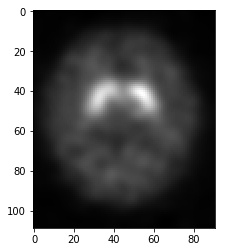

In [15]:
plt.imshow(image_array[47], cmap = plt.gray())

In [313]:
#Stack up to made RGB, so we can use pretrain model
image_array = np.stack([image_array_39, image_array_40, image_array_41], axis=3)

In [314]:
image_array.shape

(1569, 109, 91, 3)

In [315]:
lstFilesDCM[0:5]

['./PPMI 3.5/4114/Reconstructed_DaTSCAN/2015-05-01_15_52_02.0/S268044/PPMI_4114_NM_Reconstructed_DaTSCAN_Br_20150807125355176_1_S268044_I504476.dcm',
 './PPMI 2/3592/Reconstructed_DaTSCAN/2013-03-07_16_03_51.0/S199544/PPMI_3592_NM_Reconstructed_DaTSCAN_Br_20130909135303566_1_S199544_I388517.dcm',
 './PPMI 4/3910/Reconstructed_DaTSCAN/2012-12-18_15_34_07.0/S182301/PPMI_3910_NM_Reconstructed_DaTSCAN_Br_20130909140143624_1_S182301_I388557.dcm',
 './PPMI 4/3557/Reconstructed_DaTSCAN/2012-01-17_12_31_10.0/S146386/PPMI_3557_NM_Reconstructed_DaTSCAN_Br_20130124101019853_1_S146386_I355954.dcm',
 './PPMI 6/3588/Reconstructed_DaTSCAN/2012-08-17_15_39_43.0/S168151/PPMI_3588_NM_Reconstructed_DaTSCAN_Br_20130116125643778_1_S168151_I355216.dcm']

In [316]:
df[0:5]

,Group,Filenames
Image Data ID,,
504476,PD,./PPMI 3.5/4114/Reconstructed_DaTSCAN/2015-05-...
388517,PD,./PPMI 2/3592/Reconstructed_DaTSCAN/2013-03-07...
388557,PD,./PPMI 4/3910/Reconstructed_DaTSCAN/2012-12-18...
355954,PD,./PPMI 4/3557/Reconstructed_DaTSCAN/2012-01-17...
355216,PD,./PPMI 6/3588/Reconstructed_DaTSCAN/2012-08-17...


In [317]:
y = np.asarray(pd.factorize(df['Group']))[0]
print(y)

[0 0 0 ... 0 0 0]


In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, y, test_size=0.2)

In [319]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1255, 109, 91, 3) (314, 109, 91, 3) (1255,) (314,)


In [335]:
arch=resnet34
bs=64
sz=101
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on)
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_arrays('.', trn=(X_train,y_train), val=(X_test,y_test), tfms=tfms)


In [331]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
#lrf=learn.lr_find()

In [332]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      2.045907   322.12125  0.570064  



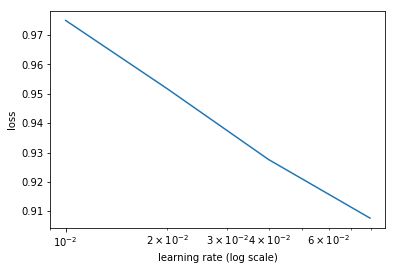

In [333]:
learn.sched.plot()

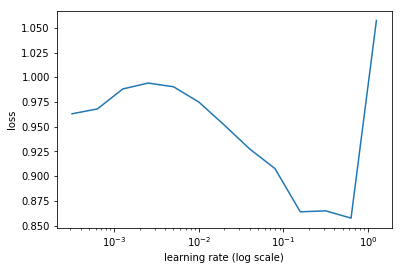

In [334]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [339]:
learn.fit(0.001, 100)

HBox(children=(IntProgress(value=0, description='Epoch'), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.505589   0.623712   0.850318  
    1      0.513567   0.600388   0.850318                 
    2      0.545862   0.599135   0.847134                 
    3      0.536949   0.599891   0.847134                 
    4      0.519161   0.61567    0.850318                  
    5      0.537071   0.587364   0.847134                  
    6      0.52982    0.599665   0.850318                 
    7      0.540398   0.620867   0.850318                  
    8      0.540106   0.616152   0.850318                 
    9      0.521582   0.601996   0.850318                 
    10     0.531587   0.613529   0.850318                  
    11     0.519654   0.582078   0.847134                 
    12     0.52505    0.575498   0.847134                 
    13     0.523276   0.583821   0.847134                 
    14     0.5292     0.620155   0.850318                  
    15     0.520796   0.586639   0.850318                  
    1

[array([0.50365]), 0.8503184724765219]

In [340]:
learn.precompute=False

In [342]:
learn.fit(1e-3, 10, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.269331   0.220307   0.901274  
    1      0.258237   0.196027   0.933121                  
    2      0.255396   0.183498   0.93949                   
    3      0.243125   0.176018   0.93949                   
    4      0.232807   0.164927   0.93949                   
    5      0.23087    0.15815    0.94586                   
    6      0.219768   0.154125   0.94586                   
    7      0.209264   0.15191    0.94586                   
    8      0.206431   0.148025   0.94586                   
    9      0.202165   0.146698   0.942675                  



[array([0.1467]), 0.9426751634117904]

In [343]:
lr = 1e-3
lrs = np.array([lr/9,lr/3,lr])

In [344]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.412985   50.193648  0.796178  



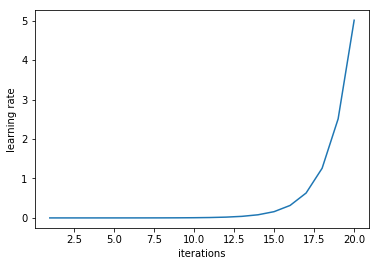

In [345]:
learn.sched.plot_lr()

In [346]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.488515   0.64246    0.853503  
    1      0.382845   0.406184   0.853503                  
    2      0.309484   0.439957   0.853503                  
    3      0.263825   0.383895   0.853503                  
    4      0.222424   0.308051   0.866242                  
    5      0.187877   0.216885   0.955414                  
    6      0.173674   0.158983   0.961783                  



[array([0.15898]), 0.96178344328692]

In [351]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

 30%|███       | 6/20 [00:01<00:03,  3.50it/s, loss=0.0466]

Exception in thread Thread-497:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                   
    0      0.050207   0.112303   0.964968  
    1      0.045245   0.11335    0.968153                   
    2      0.042989   0.112415   0.968153                   
    3      0.043407   0.117878   0.968153                   
    4      0.041454   0.127101   0.968153                   
    5      0.04007    0.116835   0.964968                   
    6      0.035822   0.117991   0.964968                   



[array([0.11799]), 0.9649681566627162]

In [38]:
learn.precompute=False

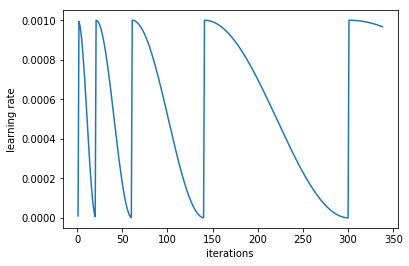

In [348]:
learn.sched.plot_lr()

In [349]:
learn.save(f'{sz}')

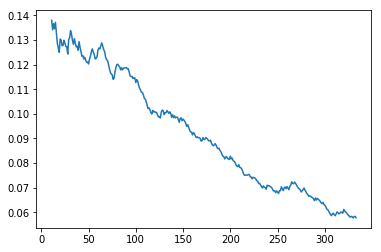

In [350]:
learn.sched.plot_loss()

In [79]:
?np.savetxt('datlist.csv', lstFilesDCM,)

In [256]:
        ??ImageClassifierData.from_paths

In [352]:
learn.ps=0.7

In [353]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.029891   0.118923   0.964968  
    1      0.032749   0.112358   0.974522                   
    2      0.036604   0.112614   0.974522                   
    3      0.030958   0.133267   0.961783                   
    4      0.032336   0.117082   0.968153                   
    5      0.02992    0.117463   0.968153                   
    6      0.029026   0.119929   0.964968                   



[array([0.11993]), 0.9649681566627162]

In [360]:
sz=224

In [361]:
tfms = tfms_from_model(arch, sz)

In [362]:
learn.set_data(data)

In [363]:
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.018329   0.120292   0.968153  
    1      0.017665   0.120505   0.964968                   
    2      0.018755   0.120532   0.968153                   
    3      0.021269   0.121079   0.968153                   
    4      0.021615   0.120931   0.968153                   
    5      0.021715   0.120862   0.968153                   
    6      0.020903   0.121251   0.968153                   



[array([0.12125]), 0.9681528700385124]

In [364]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.035256   0.123769   0.971338  
    1      0.027516   0.128587   0.968153                   
    2      0.025588   0.126877   0.971338                   
    3      0.026485   0.121515   0.971338                   
    4      0.025074   0.122098   0.974522                   
    5      0.024111   0.12326    0.971338                   
    6      0.023248   0.124468   0.971338                   

